<a href="https://colab.research.google.com/github/IML666/IML-2023/blob/main/TutorialNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Today!

# 0. Link to this file 
(File->Save a copy): http://bit.ly/42Whwdi
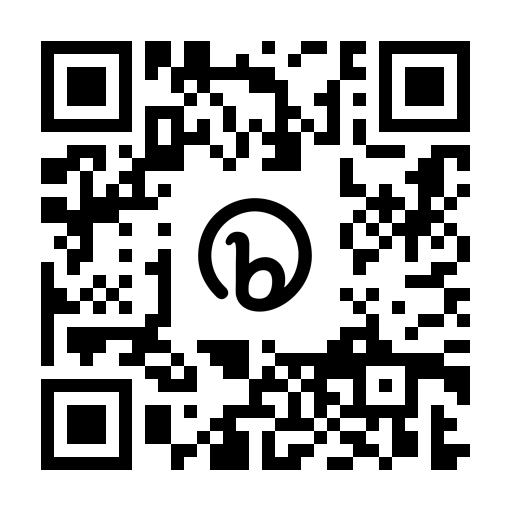

# 1. Build a working Neural Network using Keras/Tensorflow!

# 2. Binary Classification

# 3. Regression







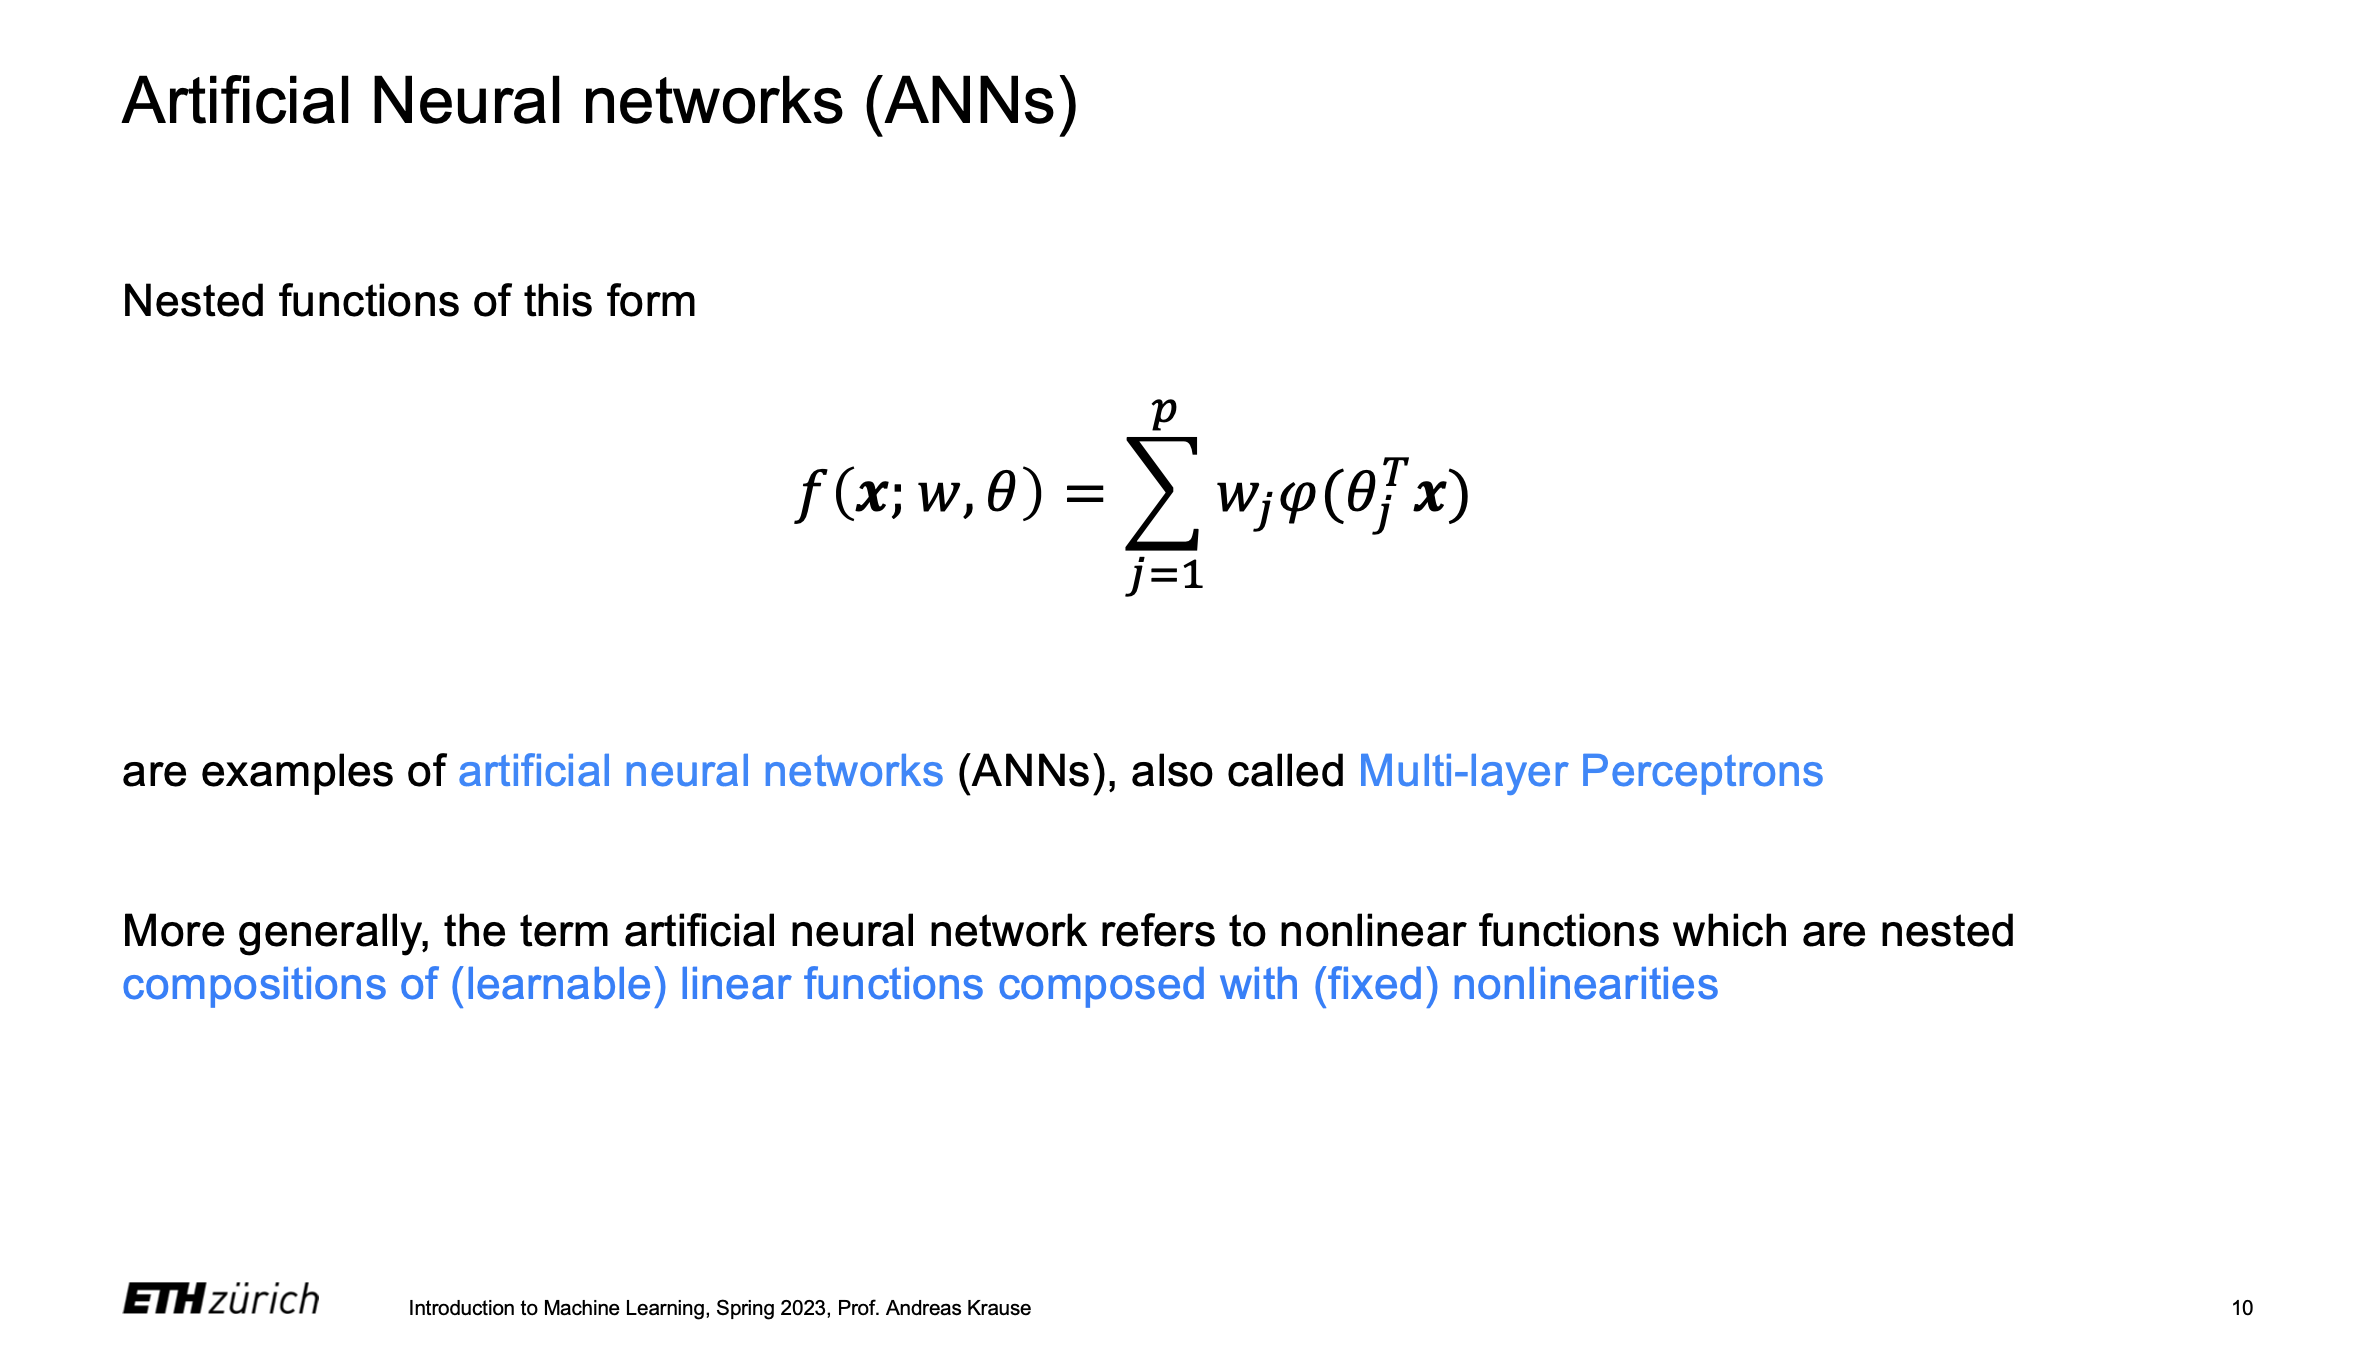

Need:

* Some Data with features $[x_1, ....x_m]$

* Activation Functions Φ

* Loss Function $l$

* Forward Propagation

* Back Propagation

* Training Loop

* Plotting and Analysis tools


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

200 200


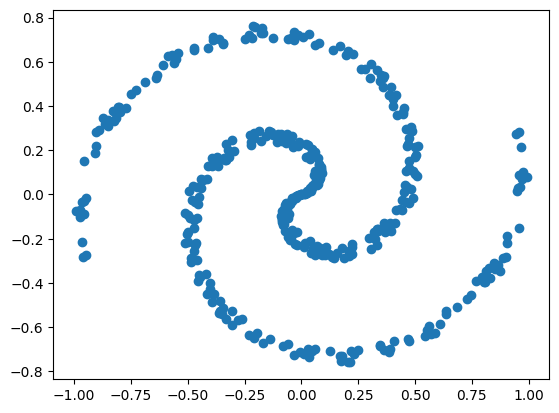

In [ ]:
# Data (Two Spirals with lables)
N = 200 # number of data points per spiral
F = 2 # number of features per data point

X = np.zeros((N*F, 2))
y = np.zeros(N*F, dtype='uint8')

r = np.linspace(0, 1, N)
theta = np.linspace(0, 2.0*np.pi, N) + np.random.rand(N)*0.4
print(r.size, theta.size)

X[:N] = np.array([r*np.cos(theta), r*np.sin(theta)]).T
X[N:] = np.array([-r*np.cos(theta), -r*np.sin(theta)]).T
# add second spiral

plt.scatter(X[:, 0], X[:, 1])


In [ ]:
# Labels (ground truth)
y[:N] = np.zeros(N)
y[N:] = np.ones(N)
y = y.reshape(2*N, 1)
print('yshape', y.shape)

yshape (400, 1)


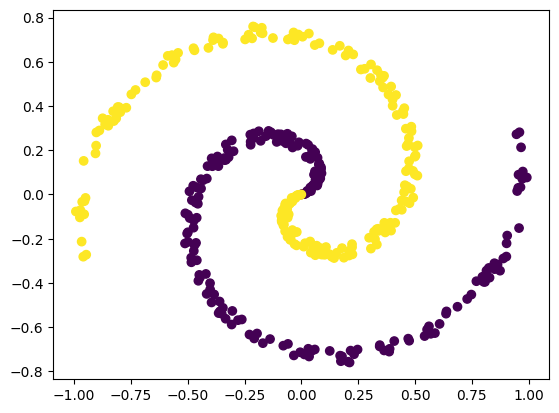

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=y)

In [ ]:
# activation function (sigmoid)
def activation(z):
  return 1 / (1 + np.exp(-z))


In [ ]:
def d_activation(z):
  return activation(z) * (1-activation(z))

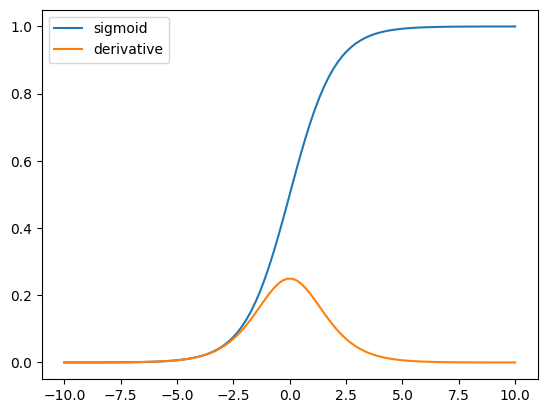

In [ ]:
px = np.linspace(-10,10,100)
plt.plot(px, activation(px), label='sigmoid')
plt.plot(px, d_activation(px), label='derivative')
plt.legend(loc='upper left')

In [ ]:
# BUILD A MODEL
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
# fully connected network
model.add(Dense(10, input_dim = 2, activation='relu'))
# output 
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.predict(X)

In [ ]:
results = model.fit(X, y, epochs=100, batch_size = 10)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8300
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3852 - accuracy: 0.8375
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8400
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8400
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3788 - accuracy: 0.8425
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8525
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.8525
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3727 - accuracy: 0.8525
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8575
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3686 - accuracy: 0.8575
Epoch 11/

In [ ]:
model.predict(X)

In [ ]:
predictions = (model.predict(X) > 0.5).astype("int32")
print(predictions)

Text(0.5, 0, 'epoch')

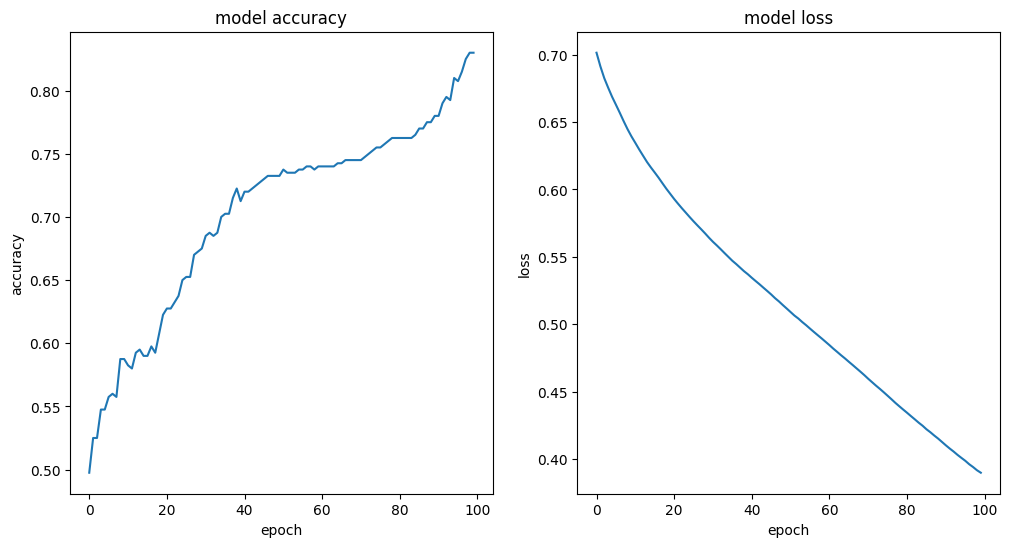

In [ ]:
plt.figure(figsize =(12,6))
# summarize history for accuracy
plt.subplot(121)
plt.plot(results.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


# summarize history for loss
plt.subplot(122)
plt.plot(results.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')



13/13 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Class boundaries')

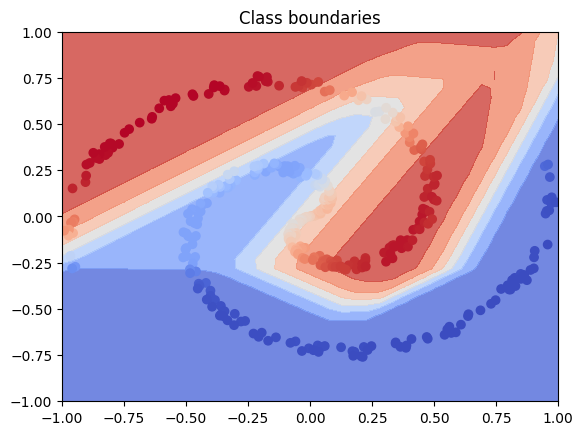

In [ ]:
from matplotlib import cm
xx = np.linspace(-1, 1, 40)
yy = np.linspace(-1, 1, 40)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict(np.c_[gx.ravel(), gy.ravel()])
Z = Z.reshape(gx.shape)

prediction_values = model.predict(X)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

axes = plt.gca()
axes.set_xlim([-1, 1])
axes.set_ylim([-1, 1])

plt.scatter(X[:,0], X[:,1], c=prediction_values[:,0], cmap=cm.coolwarm)
plt.title('Class boundaries')



In [ ]:
# what else can you do?
# look at the weights and biases in each neuron
# Input layer
weights0 = model.layers[0].get_weights()[0]
biases0 = model.layers[0].get_weights()[1]
print("Input layer weights",weights0.shape,":\n",weights0)
print("Input layer biases",biases0.shape,":\n",biases0)

# Hidden layer
weights1 = model.layers[1].get_weights()[0]
biases1 = model.layers[1].get_weights()[1]
print("\nHidden layer weights",weights1.shape,":\n",weights1)
print("Hidden layer biases",biases1.shape,":\n",biases1)

# Output layer
weights2 = model.layers[2].get_weights()[0]
biases2 = model.layers[2].get_weights()[1]
print("\nOutput layer weights",weights2.shape,":\n",weights2)
print("Output layer biases",biases2.shape,":\n",biases2)

In [ ]:
# HW: 
# compute a forward pass with these weights and biases (don't forget to apply the activation function), 
# plot and see what each neuron does!

In [ ]:
# Part 2: Regression
# GENERAL PIPELINE:
#----------DATA READING
#----------DATA CLEANUP
#----------TRAIN/TEST SPLIT 
#----------MODEL BUILDING
#----------FITTING/TRAINING THE MODEL
#----------MONITOR PROGRESS
#----------EVALUATE
#----------TEST/PREDICT
#----------VERIFY 

In [ ]:

import pandas as pd
import seaborn as sns
import tensorflow as tf



#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')

#----------DATA CLEANUP 
# drop bad data
clean_data = csv_data.dropna() 

# normalize the data
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean       0.476882      0.327867            0.540968      0.069637   
std        0.199718      0.227135            0.246803      0.057465   
min        0.000000      0.000000            0.000000      0.000000   
25%        0.254980      0.147715            0.333333      0.038487   
50%        0.583665      0.181722            0.549020      0.056017   
75%        0.632470      0.550478            0.705882      0.083017   
max        1.000000      1.000000            1.000000      1.000000   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean         0.083552      0.039984      0.082260       0.233354   
std          0.065410      0.032172      0.063233       0.131595   
min          0.000000      0.000000      0.000000       0.000000   
25%          0.04593

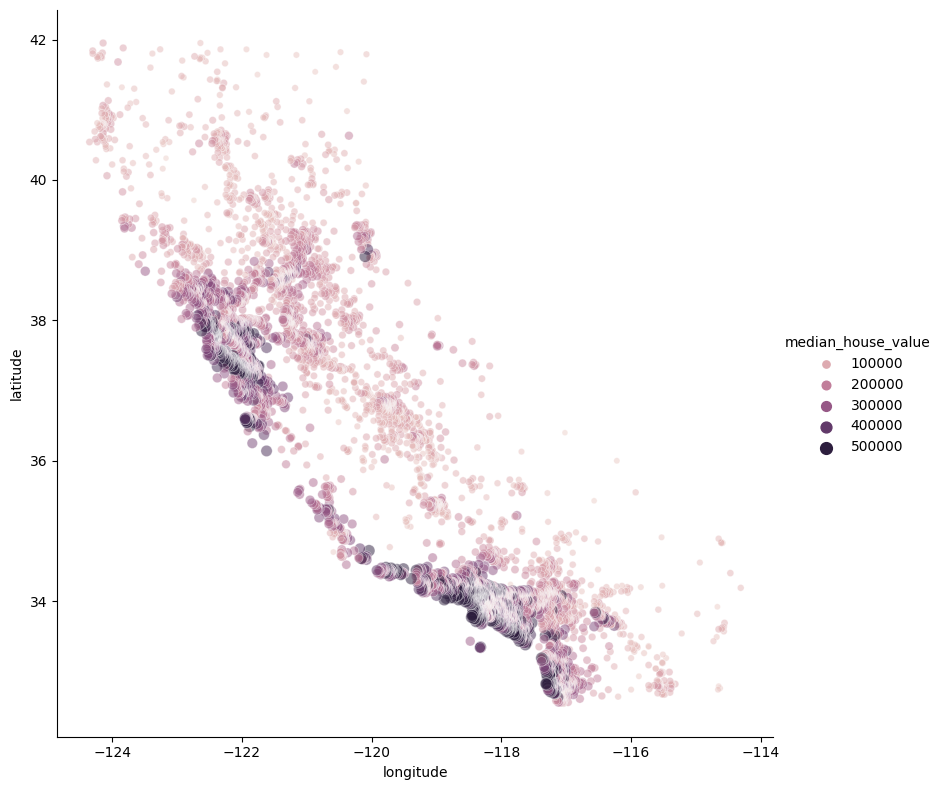

In [ ]:
# data visualization
sns.relplot(x='longitude', y='latitude', size='median_house_value', hue='median_house_value', alpha=0.5, height=8, data=csv_data)

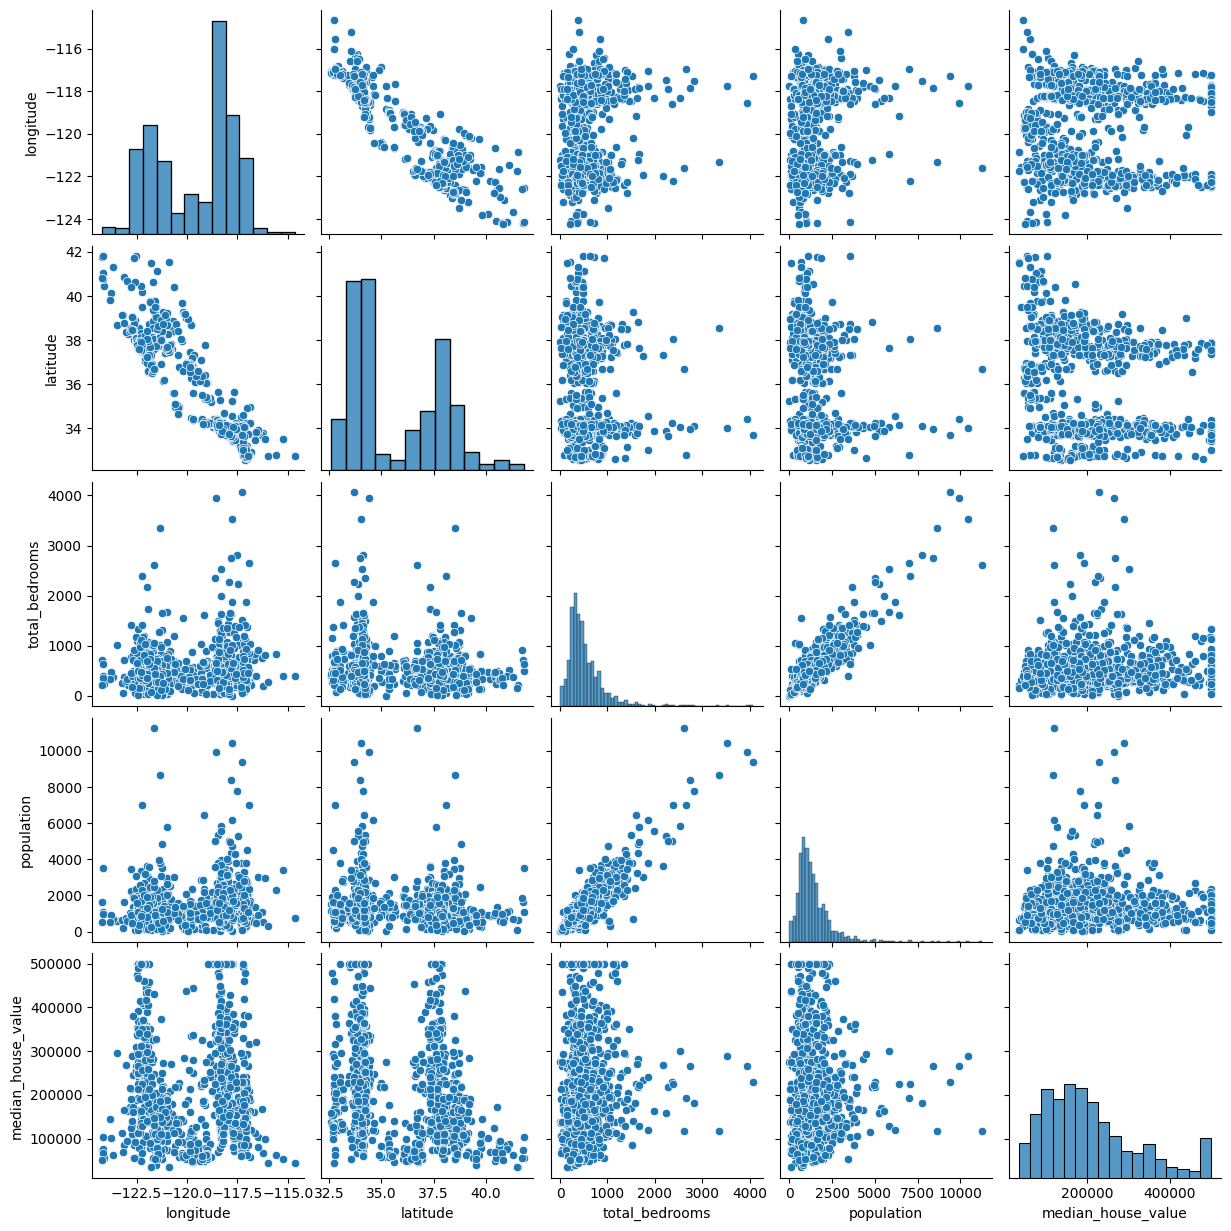

In [ ]:
sns.pairplot(csv_data.sample(n=1000)[['longitude', 'latitude', 'total_bedrooms', 'population', 'median_house_value']])

In [ ]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

In [ ]:
print(len(x_train.keys()))

In [ ]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

8
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                288       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# parameters
(8+1)*32
(32+1)*32
(32+1)*1

33

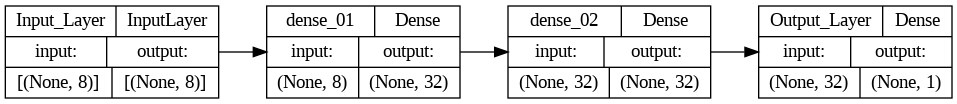

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
)

In [ ]:
# FIT/TRAIN model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/20
680/680 [==============================] - 2s 2ms/step - loss: 0.0261 - mae: 0.1188 - val_loss: 0.0202 - val_mae: 0.1028
Epoch 2/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0202 - mae: 0.1025 - val_loss: 0.0202 - val_mae: 0.1106
Epoch 3/20
680/680 [==============================] - 2s 2ms/step - loss: 0.0187 - mae: 0.0983 - val_loss: 0.0180 - val_mae: 0.0921
Epoch 4/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0176 - mae: 0.0948 - val_loss: 0.0167 - val_mae: 0.0904
Epoch 5/20
680/680 [==============================] - 2s 2ms/step - loss: 0.0170 - mae: 0.0930 - val_loss: 0.0165 - val_mae: 0.0894
Epoch 6/20
680/680 [==============================] - 2s 3ms/step - loss: 0.0166 - mae: 0.0918 - val_loss: 0.0161 - val_mae: 0.0897
Epoch 7/20
680/680 [==============================] - 1s 2ms/step - loss: 0.0164 - mae: 0.0909 - val_loss: 0.0179 - val_mae: 0.0897
Epoch 8/20
680/680 [==============================] - 1s 2ms/step - loss: 0.

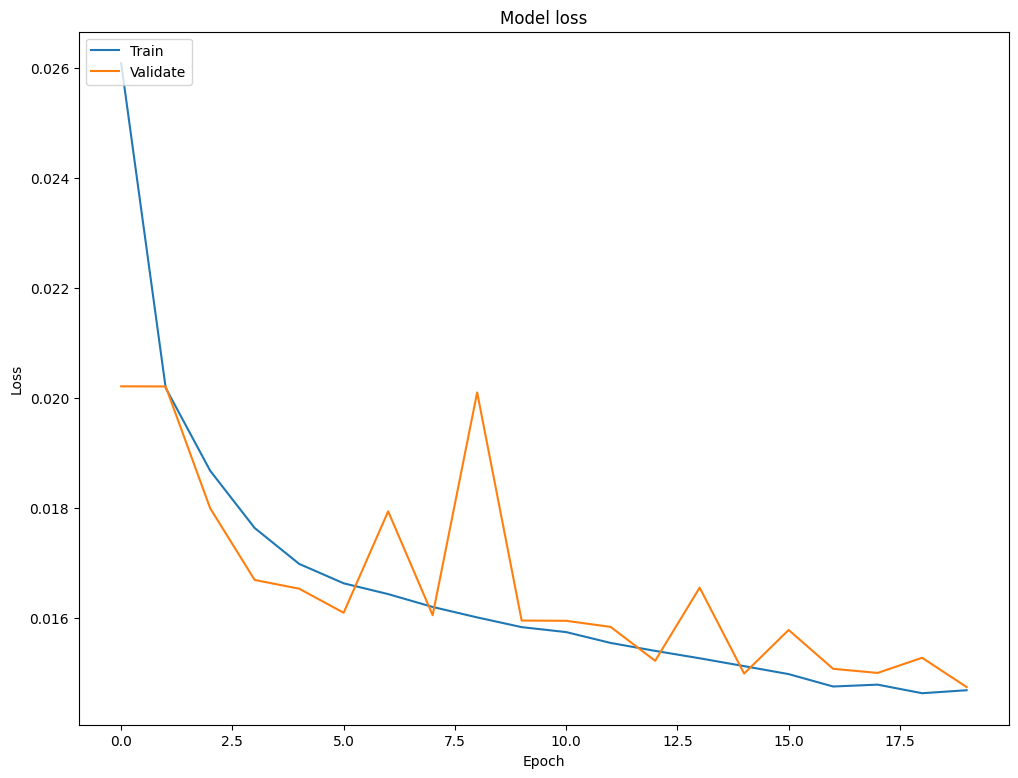

In [ ]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0146 - mae: 0.0844 - 297ms/epoch - 3ms/step
Loss: 0.014648688957095146 MAE: 0.08440246433019638


In [ ]:
#--------PREDICT
p_test = model.predict(x_test)

107/107 [==============================] - 0s 1ms/step


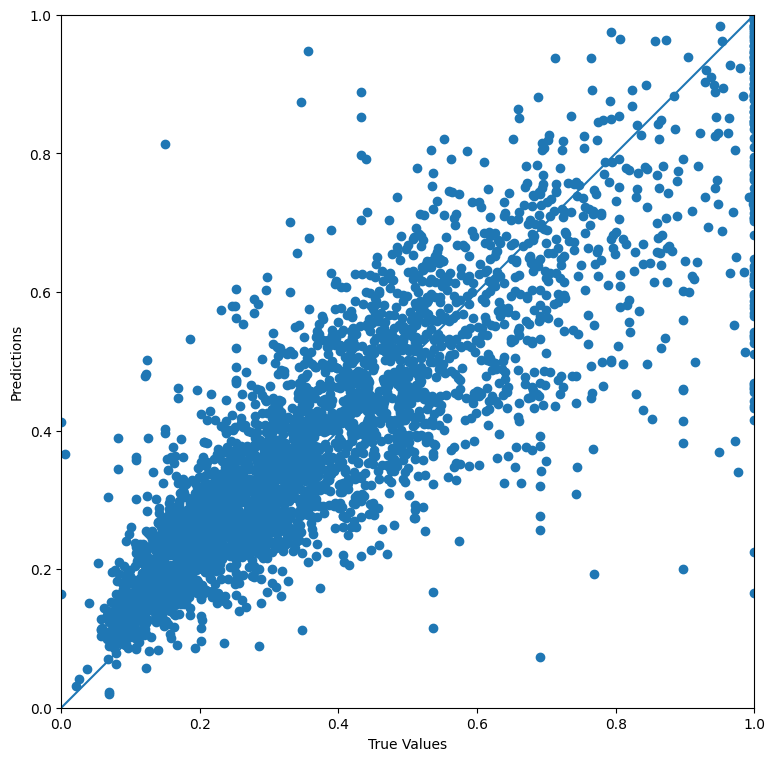

In [ ]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

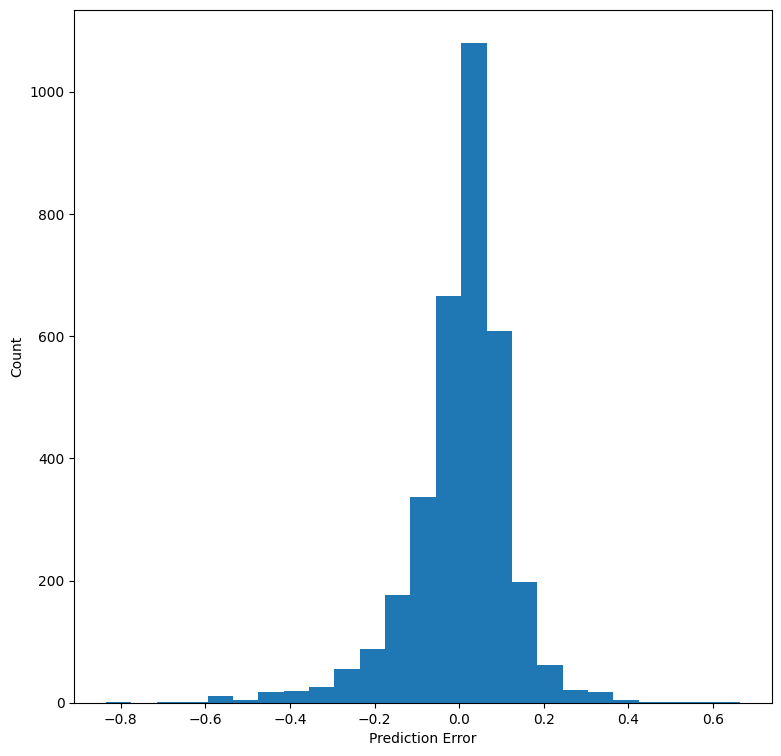

In [ ]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()